# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower.

We start by setting up the problem for you.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


We then definte some of the model for you but leave most of it for you to fill in!

*A hint: your model may want to learn some high level features and then classify them.*

In [2]:
FIRST_LAYER = layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3))
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2,2))
HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2,2))
HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu')
LAST_LAYER = layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7699 - loss: 0.6605 - val_accuracy: 0.6919 - val_loss: 0.9134
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7736 - loss: 0.6465 - val_accuracy: 0.6707 - val_loss: 0.9630
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7841 - loss: 0.6197 - val_accuracy: 0.6741 - val_loss: 0.9695
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7913 - loss: 0.6013 - val_accuracy: 0.6839 - val_loss: 0.9323
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7972 - loss: 0.5748 - val_accuracy: 0.6914 - val_loss: 0.9329
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8097 - loss: 0.5484 - val_accuracy: 0.6834 - val_loss: 0.9813
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8188 - loss: 0.5246 - val_accuracy: 0.6996 - val_loss: 0.9147
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8227 - loss: 0.5100 -

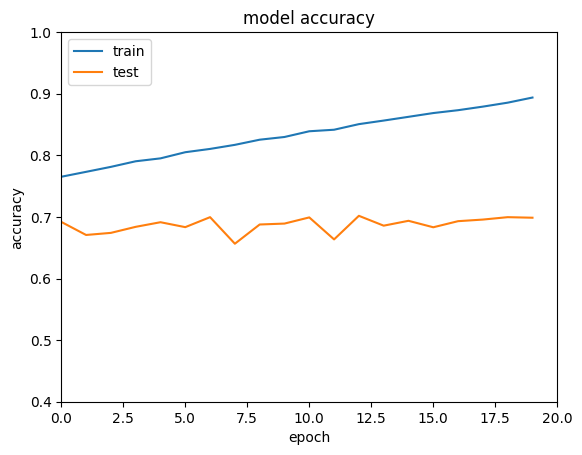

In [4]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7789 - loss: 0.6186 - val_accuracy: 0.6652 - val_loss: 1.0873
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7936 - loss: 0.5848 - val_accuracy: 0.6886 - val_loss: 0.9843
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8156 - loss: 0.5296 - val_accuracy: 0.6914 - val_loss: 0.9797
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8329 - loss: 0.4721 - val_accuracy: 0.6875 - val_loss: 0.9974
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8497 - loss: 0.4197 - val_accuracy: 0.6907 - val_loss: 1.0713
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8688 - loss: 0.3703 - val_accuracy: 0.6856 - val_loss: 1.2004
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8760 - loss: 0.3419 - val_accuracy: 0.6912 - val_loss: 1.1696
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8969 - loss: 0.2964 -

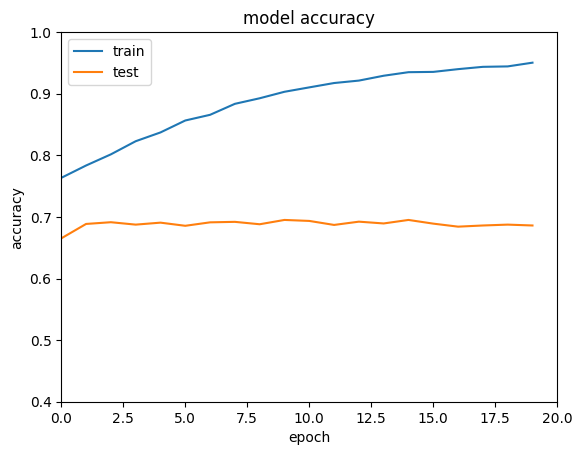

In [5]:
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Assignment solution

We hope you enjoyed developing a model that can solve the CIFAR-10 dataset!

There are many possible solutions to this assignment. One good approach (as suggested by the hints), is to use convolutional and pooling layers to find high level features and then dense layers to classify those features. A possible solution to the model design is shown below:

FIRST_LAYER = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))

HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2, 2))

HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3, 3), activation='relu')

HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2, 2))

HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64, (3, 3), activation='relu')

HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu')

LAST_LAYER = layers.Dense(10)

For this assignment an optimizer with an adaptive learning rate often performs quite well and for the loss we want something that can help optimize for differences across categories. Again there are many possible options that will work. A possible solution is:

OPTIMIZER = 'adam'

LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

As always you’ll find the link to the assignment again below in case you want to explore it a bit more now that you have a solution.